In [2]:
%matplotlib inline

import os, subprocess, tarfile
from glob import glob
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs

import warnings
warnings.filterwarnings('ignore')

seconds_per_day=60.*60.*24.
seconds_per_year=365.*seconds_per_day
carbon_molar_mass=12.011
cobalt_n_2_c = 106./16.

In [6]:
diagTypes = ['ocean_cobalt_fdet_100', 'ocean_cobalt_omip_2d'] 
pp_dates='1988-2007'

archivedir = '/archive/jyl/model_climatologies/GZ-COBALT/OM4p5_CORE2_IAF_gzCOBALT-Control-062321'
c_files=[glob(archivedir + '/'+ d + '.' + pp_dates + '*.nc') for d in diagTypes]
c_files=sorted([f for fi in c_files for f in fi]) # nested list comprehension


In [8]:
dc=xr.open_mfdataset(c_files, combine='by_coords')
grid = xr.open_dataset('/work/jyl/tmp/ocean_static.nc')

In [9]:
exptdir='/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-060822'
files=[glob(exptdir + '/'+ d + '.' + pp_dates + '*.nc') for d in diagTypes]
files=sorted([f for fi in files for f in fi]) # nested list comprehension

In [10]:
ds=xr.open_mfdataset(files, combine='by_coords')

In [17]:
slope_files = glob('/work/jyl/proj/gz_COBALT_POC/data/NBSS_slopes_*')
ss = xr.open_mfdataset(slope_files, combine='by_coords')
ss

<xarray.Dataset>
Dimensions:           (yh: 576, xh: 720)
Coordinates:
  * yh                (yh) float64 -77.91 -77.72 -77.54 ... 89.47 89.68 89.89
  * xh                (xh) float64 -299.8 -299.2 -298.8 ... 58.75 59.25 59.75
Data variables:
    NBSS_slopes_Ctrl  (yh, xh) float64 dask.array<chunksize=(576, 720), meta=np.ndarray>
    NBSS_slopes_GZ    (yh, xh) float64 dask.array<chunksize=(576, 720), meta=np.ndarray>

In [20]:
eratio = (ds.fndet_100 + ds.fndet_fast_100).mean(dim='time') * cobalt_n_2_c / ds.intpp.mean(dim='time')
c_eratio = (ds.fndet_100).mean(dim='time') * cobalt_n_2_c / ds.intpp.mean(dim='time')

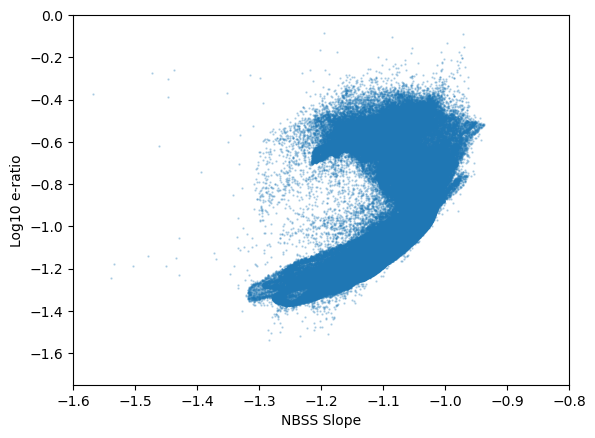

In [48]:
plt.scatter(ss.NBSS_slopes_GZ, np.log10(eratio), s=0.4, alpha=0.3)
plt.ylim(-1.75,0)
plt.xlim(-1.6,-0.8)
plt.ylabel('Log10 e-ratio')
plt.xlabel('NBSS Slope')
plt.savefig('plots/NBSS_slope_vs_eratio_GZ-COBALT_tunOnly_cy1.png', dpi=300)

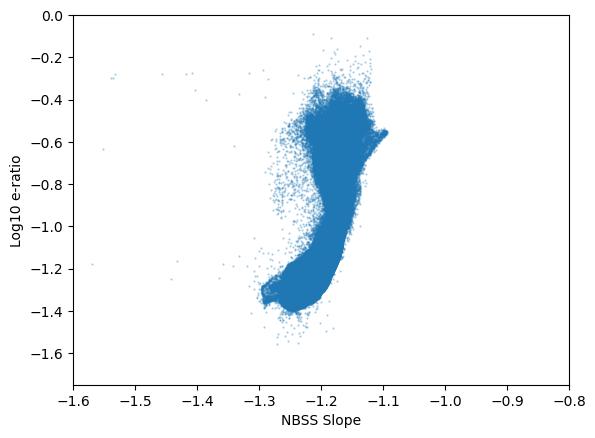

In [49]:
plt.scatter(ss.NBSS_slopes_Ctrl, np.log10(c_eratio), s=0.4, alpha=0.3)
plt.ylim(-1.75,0)
plt.xlim(-1.6,-0.8)
plt.ylabel('Log10 e-ratio')
plt.xlabel('NBSS Slope')
plt.savefig('plots/NBSS_slope_vs_eratio_Ctrl-COBALTv2.png', dpi=300)